# The problem statement is given below:
    
1. The dataset given for this problem consists of data extracted from satellite images.
The number of features is 36.

2. Reduce the dimensionality of the dataset using PCA. The threshold limits for the
eigenvalues should be varied from 0.9 to 0.97 in steps of 0.01.

3. Obtain the Scree plot for each of these cases. Find the number of principal
components retained due to the thresholding.

In [2]:
import pandas as pd
import numpy as np
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('PCA_practice_dataset.csv',header = None)

In [4]:
df.shape

(8042, 35)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.03125,0.236364,0.238095,-0.090909,0.000000,0.381818,0.326316,-0.015625,-0.12500,0.553398,...,0.576923,0.471264,-0.033333,-0.046154,0.524752,0.410526,-0.015625,-0.18750,0.495146,0.515789
1,-0.03125,0.309091,0.380952,0.074380,0.129032,0.472727,0.557895,0.078125,-0.03125,0.398058,...,0.519231,0.425287,0.000000,0.138462,0.663366,0.368421,0.015625,0.12500,0.533981,0.368421
2,-0.03125,0.381818,0.261905,-0.107438,0.000000,0.527273,0.326316,0.046875,-0.03125,0.631068,...,0.384615,0.103448,-0.250000,-0.138462,0.425743,0.263158,-0.109375,-0.03125,0.650485,0.452632
3,-0.03125,0.381818,0.285714,-0.123967,-0.129032,0.309091,0.073684,-0.156250,0.09375,0.398058,...,0.519231,0.425287,-0.050000,-0.107692,0.485149,0.368421,-0.031250,-0.25000,0.203883,0.094737
4,-0.03125,0.381818,0.357143,-0.024793,-0.096774,0.454545,0.431579,-0.015625,-0.25000,0.398058,...,0.480769,0.471264,-0.033333,-0.169231,0.524752,0.515789,-0.015625,-0.28125,0.495146,0.410526


#Checking Missing Values 

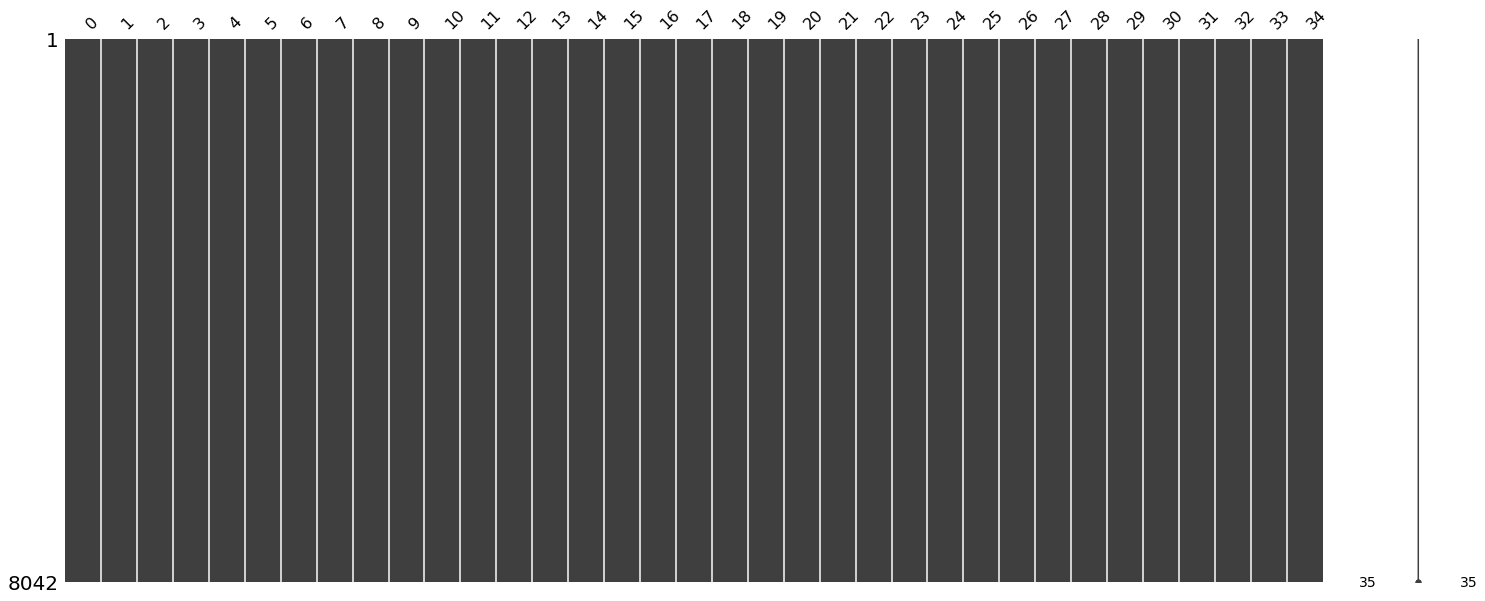

In [6]:
msno.matrix(df) 

#No Missing Values in the Dataset 

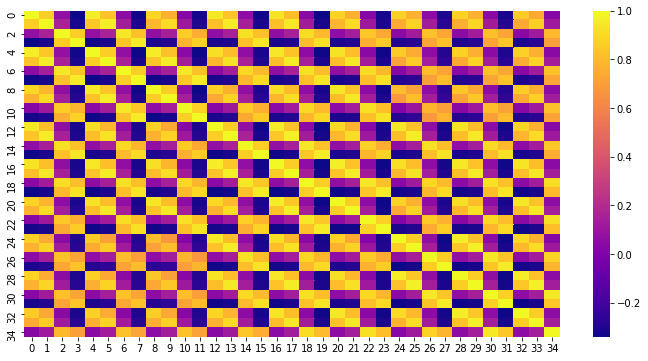

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='plasma')

In [8]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.000000,0.861469,0.068567,-0.335877,0.960920,0.827831,0.051271,-0.333948,0.894951,0.766032,...,0.767274,0.051828,-0.306768,0.875597,0.766027,0.039296,-0.315128,0.851350,0.738852,0.027171
1,0.861469,1.000000,0.154897,-0.316634,0.845123,0.968153,0.140443,-0.312999,0.788522,0.905602,...,0.879947,0.134475,-0.282411,0.756293,0.886560,0.126449,-0.290251,0.742042,0.866252,0.117408
2,0.068567,0.154897,1.000000,0.866862,0.074354,0.154614,0.944832,0.826112,0.067381,0.144545,...,0.129524,0.823583,0.729281,0.047475,0.129729,0.820426,0.727390,0.039356,0.122555,0.791909
3,-0.335877,-0.316634,0.866862,1.000000,-0.325553,-0.305477,0.839675,0.955026,-0.307283,-0.286205,...,-0.275621,0.724673,0.831432,-0.299542,-0.281607,0.727251,0.836152,-0.304020,-0.282376,0.703792
4,0.960920,0.845123,0.074354,-0.325553,1.000000,0.861363,0.069767,-0.334349,0.957263,0.825754,...,0.745566,0.057948,-0.291247,0.869750,0.763394,0.051565,-0.301645,0.871817,0.762072,0.041211
5,0.827831,0.968153,0.154614,-0.305477,0.861363,1.000000,0.154921,-0.314855,0.840626,0.966072,...,0.853617,0.138222,-0.266213,0.742730,0.877373,0.136137,-0.274965,0.752432,0.883503,0.129595
6,0.051271,0.140443,0.944832,0.839675,0.069767,0.154921,1.000000,0.866840,0.070677,0.151081,...,0.121466,0.808669,0.718399,0.046245,0.128637,0.824737,0.731583,0.041298,0.126588,0.824369
7,-0.333948,-0.312999,0.826112,0.955026,-0.334349,-0.314855,0.866840,1.000000,-0.326938,-0.306968,...,-0.269937,0.706558,0.810788,-0.292053,-0.274746,0.724256,0.829538,-0.302865,-0.282141,0.727466
8,0.894951,0.788522,0.067381,-0.307283,0.957263,0.840626,0.070677,-0.326938,1.000000,0.860304,...,0.711413,0.058985,-0.276272,0.842754,0.737781,0.056677,-0.284923,0.863705,0.755739,0.050378
9,0.766032,0.905602,0.144545,-0.286205,0.825754,0.966072,0.151081,-0.306968,0.860304,1.000000,...,0.814263,0.136111,-0.250221,0.711067,0.846197,0.137859,-0.258477,0.736773,0.869810,0.135116


In [33]:
mean_df = np.mean(df,axis=0)

In [34]:
mean_df

0    -0.165659
1    -0.079283
2     0.029327
3    -0.144956
4    -0.148948
5    -0.088673
6     0.032709
7    -0.130379
8    -0.181751
9    -0.033018
10    0.027053
11   -0.132390
12   -0.143752
13   -0.031492
14    0.005311
15   -0.119625
16   -0.179660
17   -0.031594
18    0.040506
19   -0.169525
20   -0.166624
21   -0.036067
22    0.090359
23   -0.105323
24   -0.170106
25   -0.028684
26    0.062957
27   -0.150755
28   -0.160209
29   -0.007784
30    0.036346
31   -0.124960
32   -0.183295
33   -0.032496
34    0.033768
dtype: float64

In [28]:
cov_df = np.cov(df)

In [29]:
cov_df

array([[0.19764431, 0.17701134, 0.01257267, ..., 0.16638061, 0.1618049 ,
        0.00438509],
       [0.17701134, 0.21361826, 0.02952786, ..., 0.15076468, 0.19722215,
        0.01969913],
       [0.01257267, 0.02952786, 0.17011288, ..., 0.00713569, 0.02489953,
        0.1185702 ],
       ...,
       [0.16638061, 0.15076468, 0.00713569, ..., 0.19324326, 0.18621942,
        0.00902953],
       [0.1618049 , 0.19722215, 0.02489953, ..., 0.18621942, 0.24265213,
        0.02507959],
       [0.00438509, 0.01969913, 0.1185702 , ..., 0.00902953, 0.02507959,
        0.13178428]])

In [37]:
eig_val,eig_vec = np.linalg.eig(cov_df)

In [38]:
eig_vec.shape

(35, 35)

In [39]:
eig_val.ndim

1

In [40]:
df.shape

(8042, 35)

In [42]:
eig_vec[:,0].shape

(35,)

In [44]:
eigen_vec_ls = []
eig1 = df@eig_vec[:,0]
#print(eig1.shape)
for i in range(eig_vec.shape[1]):
    eig1 = df@eig_vec[:,i]
    eig1 = eig1/eig_val[i]
    eigen_vec_ls.append(np.ravel(eig1))
print(eigen_vec_ls)

[array([ 0.2629715 ,  0.29355157,  0.2752796 , ..., -0.05641767,
        0.01772987, -0.01232639]), array([ 0.59127675,  0.58542864,  0.40030446, ..., -1.01226118,
       -0.83703822, -1.04193292]), array([-4.70972047, -3.73284221, -4.89537733, ..., -1.49140278,
       -1.7570309 , -1.63552726]), array([ 0.55588636,  1.78550606,  0.17342257, ..., -1.55852628,
        1.64848411,  0.70929326]), array([ 1.74335619,  0.34245138, -2.81805252, ..., -2.37121403,
        2.36740885,  3.25321676]), array([ 0.32195603, -0.09454092,  4.39440218, ...,  1.46065336,
       -0.11473181,  0.29592032]), array([-3.7313987 ,  0.42694147, -8.43114792, ..., -1.49352717,
       -0.7148587 , -1.92325494]), array([-5.45558253,  2.64463896, -3.65113933, ...,  0.89717826,
       -0.85064956, -3.76752371]), array([-0.97904388, -3.10206044, -4.40405858, ..., -5.46393269,
       -3.16931688, -2.84668347]), array([-12.96899219,   7.77424423,  12.49423304, ...,  -0.85517739,
         1.7575105 ,  -5.69160474]), arr

In [56]:
###**********************************************************************************************************************

sort_idx = np.argsort(eig_val) ## indices for eigenvalues which are in ascending order
sort_idx = sort_idx[::-1]

eig_val_sum = np.sum(eig_val)
temp_sum = 0
principal_eig_vec = []
principal_eig_val = []
i=0

#Selecting the Threshold of Eigen Value as 92% 

while(temp_sum<0.92*eig_val_sum):
    principal_eig_vec.append(eigen_vec_ls[sort_idx[i]])
    principal_eig_val.append(eig_val[sort_idx[i]])
    temp_sum += eig_val[sort_idx[i]]
    i += 1
print("Number of components is {}".format(i))

Number of components is 4


In [57]:
Q_hat = np.matrix(principal_eig_vec)
Q_hat

matrix([[ 0.2629715 ,  0.29355157,  0.2752796 , ..., -0.05641767,
          0.01772987, -0.01232639],
        [ 0.59127675,  0.58542864,  0.40030446, ..., -1.01226118,
         -0.83703822, -1.04193292],
        [-4.70972047, -3.73284221, -4.89537733, ..., -1.49140278,
         -1.7570309 , -1.63552726],
        [ 0.55588636,  1.78550606,  0.17342257, ..., -1.55852628,
          1.64848411,  0.70929326]])

# Scree Plot 

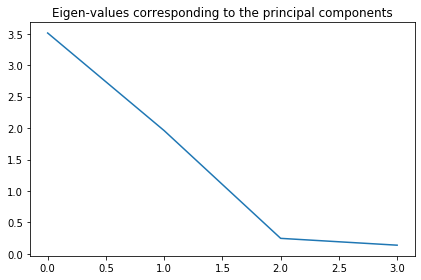

In [58]:
fig, ax = plt.subplots()

ax.plot(principal_eig_val)
ax.set_title("Eigen-values corresponding to the principal components")

plt.tight_layout()